<a href="https://colab.research.google.com/github/codemist04/Sales-Summary-using-sqlite-in-python-TASK-7/blob/main/Sales_Summary_using_Sqlite_in_Python_Task7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
!pip install pandas matplotlib


In [19]:
import sqlite3

#Connect to SQLite
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

sales_data = [
    ("iPhone 15", 5, 1200),
    ("Samsung Galaxy S24", 8, 1100),
    ("Dell XPS 13 Laptop", 3, 1500),
    ("Sony WH-1000XM5 Headphones", 10, 350),
    ("Nike Air Max 270", 12, 150),
    ("LG 55\" OLED TV", 2, 2000),
    ("HP Envy Printer", 6, 200),
    ("Adidas Ultraboost", 7, 180),
    ("MacBook Air M2", 4, 1400),
    ("Bose SoundLink Speaker", 9, 250)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sales_data)

#Commit and close
conn.commit()
conn.close()
print("sales_data.db created with sales data.")


sales_data.db created with sales data.


In [20]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#Connect to the database
conn = sqlite3.connect("sales_data.db")

#Query per-product sales
query = """
SELECT product,
       SUM(quantity) AS total_qty,
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
ORDER BY revenue DESC
"""
df = pd.read_sql_query(query, conn)

# Query for overall totals
totals_query = """
SELECT SUM(quantity) AS total_qty,
       SUM(quantity * price) AS revenue
FROM sales
"""
totals_df = pd.read_sql_query(totals_query, conn)

conn.close()

#Formatting revenues
df['revenue_formatted'] = df['revenue'].apply(lambda x: f"${x:,.2f}")
totals_df['revenue_formatted'] = totals_df['revenue'].apply(lambda x: f"${x:,.2f}")

print("\n--- Sales by Product ---")
print(df[['product', 'total_qty', 'revenue_formatted']])

print("\n--- Overall Totals ---")
print(totals_df[['total_qty', 'revenue_formatted']])





--- Sales by Product ---
                      product  total_qty revenue_formatted
0          Samsung Galaxy S24         32        $35,200.00
1                   iPhone 15         20        $24,000.00
2              MacBook Air M2         16        $22,400.00
3          Dell XPS 13 Laptop         12        $18,000.00
4              LG 55" OLED TV          8        $16,000.00
5  Sony WH-1000XM5 Headphones         40        $14,000.00
6      Bose SoundLink Speaker         36         $9,000.00
7            Nike Air Max 270         48         $7,200.00
8           Adidas Ultraboost         28         $5,040.00
9             HP Envy Printer         24         $4,800.00

--- Overall Totals ---
   total_qty revenue_formatted
0        264       $155,640.00


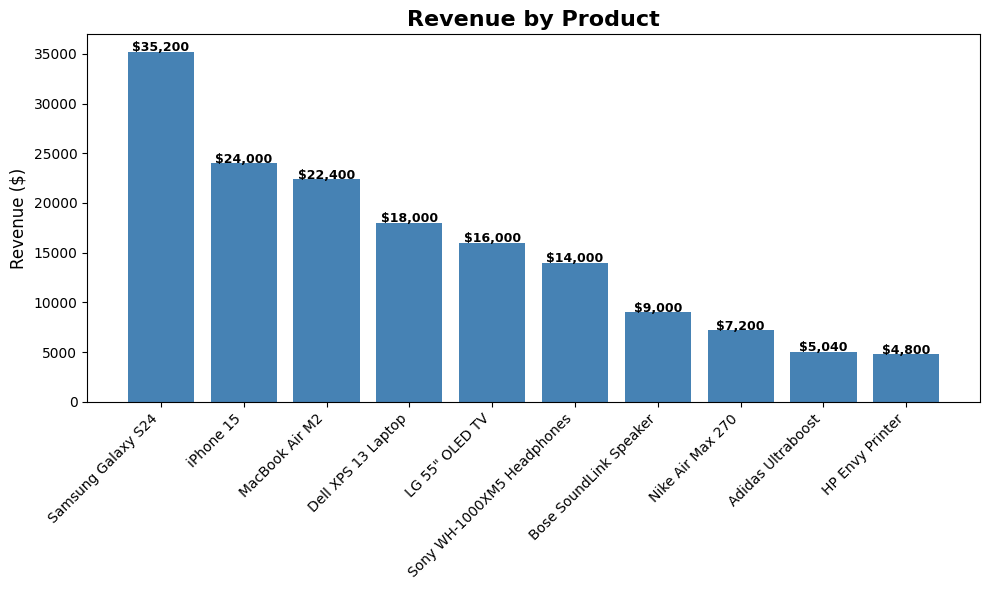

In [21]:
# Bar chart
plt.figure(figsize=(10,6))
bars = plt.bar(df['product'], df['revenue'], color="steelblue")
plt.title("Revenue by Product", fontsize=16, fontweight='bold')
plt.ylabel("Revenue ($)", fontsize=12)
plt.xticks(rotation=45, ha="right")

for bar, revenue in zip(bars, df['revenue']):
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height() + 50,
             f"${revenue:,.0f}",
             ha='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()
